## Predicting future global temperature and greenhouse gas emissions

### Capstone Project Three : Springboard Data Science career track

### 1.Introduction

Global warming, marked by a sustained increase in average temperatures, leads to lasting changes in weather patterns and ecosystems. This project aims to predict the future interplay between greenhouse gas (GHG) emissions and global temperature changes. CO2, CH4, and N2O, identified by the European Commission as the most impactful gases on global warming (European Commission, 2018), are the focus of this study. By examining the relationships between these emissions and temperature fluctuations, the study seeks to provide predictive insights for formulating effective environmental policies.
Climate change, defined by long-term shifts in weather patterns, is significantly affecting life on Earth. Substantial evidence, such as the rise in ocean temperatures and the increased frequency of extreme weather events, underscores the reality of climate change. Addressing global warming is a critical challenge that demands accurate predictions of GHG emissions and temperature impacts, essential for developing strategies to mitigate its effects on a global scale.


### 2.Research questions

**1-Quantify the Relationship:** Analyze the correlation between CO2, N2O, and CH4 emissions with global temperature variations to understand the relative impact of each GHG on climate change.

**2-Trend Analysis:** Identify and model trends in both GHG emissions and global temperature changes over the decades to forecast future climate conditions.

**3-Predictive Modeling:** Develop predictive models to forecast future global temperature changes based on current and hypothetical future GHG emission trends.


### 3.Import the necessary libraries and the data

### 3.1.Import libraries

### 3.2.Load teh data

In [1]:
!pip install pmdarima


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import warnings
warnings.filterwarnings('ignore')
import pmdarima as pm

In [3]:
# Loading data

df= pd.read_csv("https://raw.githubusercontent.com/Mary080102/Capstone-3/main/Raw%20data/df")

In [4]:
df

,Year,Month,Anomaly,Uncertainty,CO2,CH4,N2O,Actual_Temperature
0,1984,1,0.291,0.055,344.32,1638.79,303.8,12.521
1,1984,2,0.145,0.054,344.82,1638.84,303.8,12.585
2,1984,3,0.292,0.042,344.96,1640.88,303.7,13.352
3,1984,4,0.178,0.070,345.19,1643.99,303.7,14.148
4,1984,5,0.388,0.043,345.33,1643.12,303.7,15.338
...,...,...,...,...,...,...,...,...
931,2022,8,0.830,0.034,414.41,1908.82,335.8,16.610
932,2022,9,0.756,0.034,414.63,1915.52,335.9,15.946
933,2022,10,0.871,0.034,416.14,1919.85,336.1,15.121
934,2022,11,0.654,0.048,417.77,1923.43,336.3,13.884


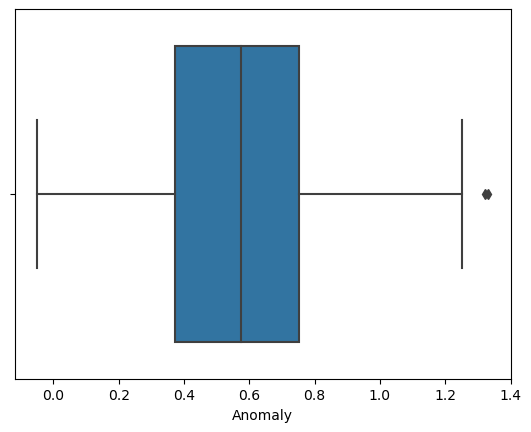

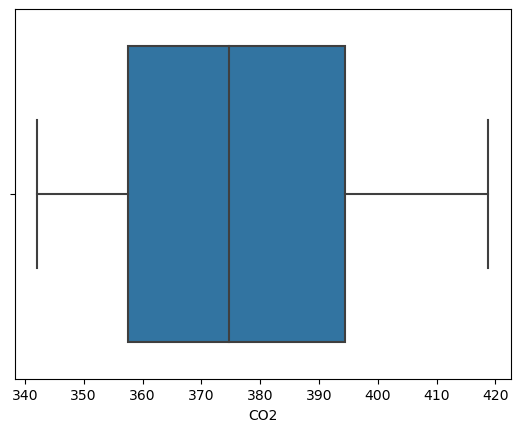

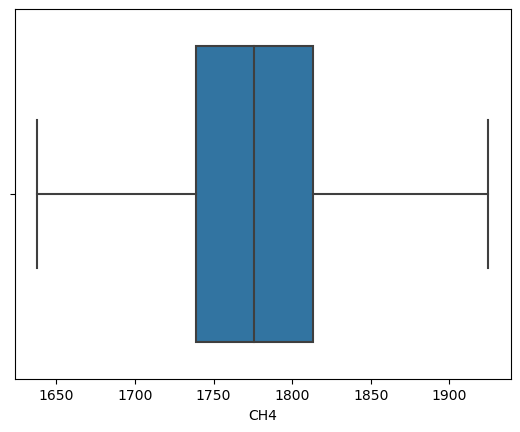

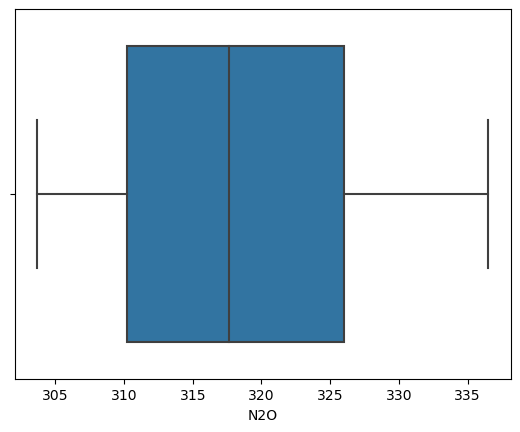

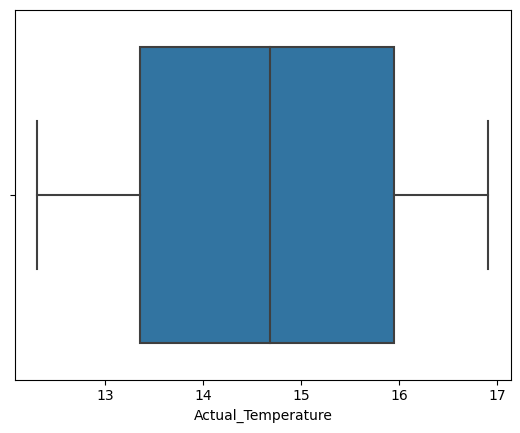

In [5]:
# Check for outliers

columns_to_plot = ['Anomaly', 'CO2', 'CH4', 'N2O', 'Actual_Temperature']

for column in columns_to_plot:
    sns.boxplot(x=df[column])
    plt.show()



### 4.Split into testing and training datasets

In [6]:
#Separate the features and the target variable

X= df.drop(columns=['Anomaly','Month','Uncertainty'])
y= df['Anomaly']

# Split the data into training and testing sets
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

# Print the shape of the resulting datasets
print(f'X_train shape :{X_train.shape}')
print(f'X_test shape : {X_test.shape}')
print(f'y_train shape :{y_train.shape}')
print(f'y_test shape :{y_test.shape}')

X_train shape :(748, 5)
X_test shape : (188, 5)
y_train shape :(748,)
y_test shape :(188,)



### 5.Feature Scaling

Given that the features (CO2, CH4, N2O, and Temperature) have different units and ranges, I should standardize or normalize the data.Given that the features (especially CO2 and CH4) are not perfectly normally distributed and have skewness, **standardization** would generally be the better option. It would handle the variance and spread of the data more effectively, particularly for models like linear regression or algorithms that assume data is centered around 0.

In [7]:
# Instantiate the scaler

scaler= StandardScaler()

# Apply the scaler to the training data

X_train_scaled= scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


### 6.Feature Selection

Based on the results from previouse step(EDA)and correlation matrix the following features will be considered:

* CO2
* N2O
* CH4
* Anomaly
* Actual_Temperature

### 7. Model Selection

This is a regression problem, in supervised learning. Here we have used the following models:

**1- Random Forest**

**2- Gradient Boosting**

**3-ARIMA Time series model**

### 7.1.Random Forest Model

In [8]:
# Initialize and fit the Random Forest model
rf=RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)

# Make predictions

y_pred_rf=rf.predict(X_test)

# Evaluate the model
mse_rf= mean_squared_error(y_test,y_pred_rf)
r2_rf= r2_score(y_test,y_pred_rf)

print(f'Random forest MSE: {mse_rf:.4f}')
print(f'Random Forest R2 Score: {r2_rf:.4f}')

Random forest MSE: 0.0070
Random Forest R2 Score: 0.8920


In [9]:
# Assessing performance using cross-validation
cv_scores_test = cross_val_score(rf, X_test, y_test, cv=5, scoring='r2')
cv_scores_train = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')

# Calculate the mean and standard deviation for cross-validation scores
cv_scores_rf_test = cv_scores_test.mean()
cv_scores_rf_train = cv_scores_train.mean()
cv_scores_std_rf_test = cv_scores_test.std()
cv_scores_std_rf_train = cv_scores_train.std()

print(f'Mean cross-validation test score: {cv_scores_rf_test:.4f}')
print(f'Mean cross-validation train score: {cv_scores_rf_train:.4f}')
print(f'Standard deviation in cv scores (test): {cv_scores_std_rf_test:.4f}')
print(f'Standard deviation in cv scores (train): {cv_scores_std_rf_train:.4f}')

Mean cross-validation test score: 0.7194
Mean cross-validation train score: 0.8715
Standard deviation in cv scores (test): 0.0803
Standard deviation in cv scores (train): 0.0157


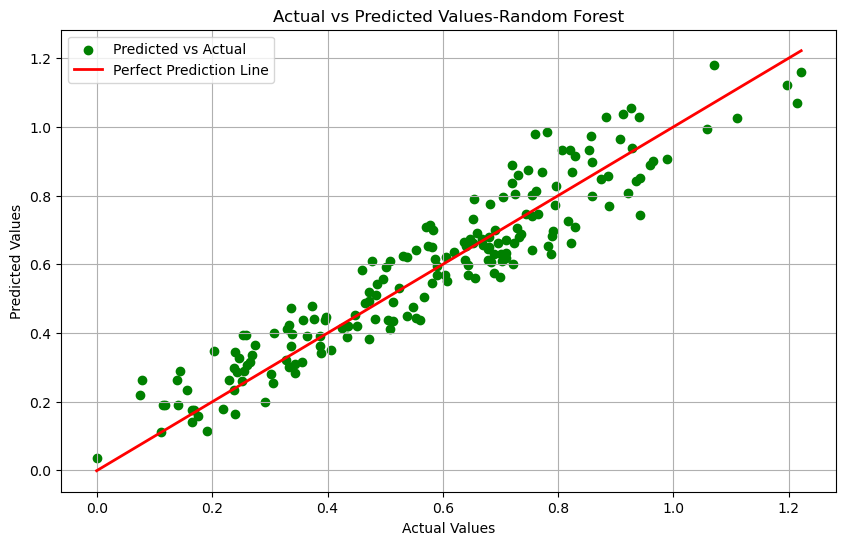

In [10]:
# Plotting
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rf, color='green', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction Line')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values-Random Forest')
plt.legend()
plt.grid(True)
plt.show()

Plot indicates that the Random Forest model is performing well, with predictions closely aligning with actual values. The majority of the data points are clustered around the perfect prediction line, suggesting good accuracy. However, there are some minor deviations, particularly at higher actual values, indicating potential areas for improvement. Overall, the model demonstrates a good balance between bias and variance, but there may be opportunities for further tuning to enhance prediction accuracy.

### 7.2.Gradient Boosting

In [11]:
# Initialize and fit the Gradient Boosting model
gb= GradientBoostingRegressor()

gb.fit(X_train,y_train)

# Predict on the test set
y_pred_gb= gb.predict(X_test)

# Evaluate the model
mse_gb= mean_squared_error(y_test,y_pred_gb)
r2_gb=r2_score(y_test,y_pred_gb)

print(f'Grsdient Boosting MSE: {mse_rf:.4f}')
print(f'Grsdient Boosting R2 Score: {r2_rf:.4f}')

Grsdient Boosting MSE: 0.0070
Grsdient Boosting R2 Score: 0.8920


In [12]:
#Assessing performance using cross-validation

cv_scores_test = cross_val_score(gb,X_test,y_test,cv=5,scoring='r2')
cv_scores_train= cross_val_score(gb,X_train,y_train,cv=5,scoring='r2')

print(cv_scores_test)

cv_scores_gb_test = cv_scores_test.mean()
cv_scores_gb_train = cv_scores_train.mean()
cv_scores_std_gb_test = cv_scores_test.std()
cv_scores_std_gb_train = cv_scores_train.std()

print(f'Mean cross-validation test score: {cv_scores_gb_test:.4f}')
print(f'Mean cross-validation train score: {cv_scores_gb_train:.4f}')
print(f'Standard deviation in cv scores (test): {cv_scores_std_gb_test:.4f}')
print(f'Standard deviation in cv scores (train): {cv_scores_std_gb_train:.4f}')

[0.66703504 0.70399427 0.76861506 0.5441433  0.72724282]
Mean cross-validation test score: 0.6822
Mean cross-validation train score: 0.8311
Standard deviation in cv scores (test): 0.0765
Standard deviation in cv scores (train): 0.0279


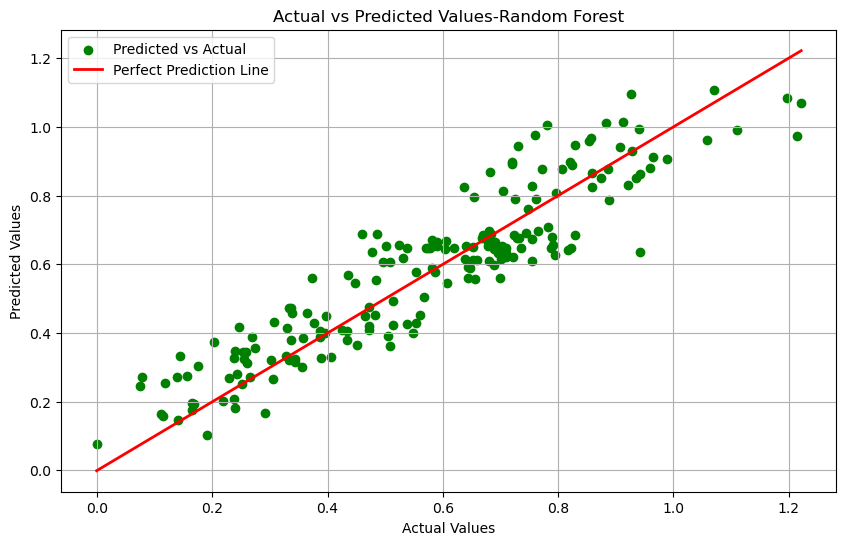

In [13]:
# Plot observed vs predicted values

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_gb,color='green',label='Predicted vs Actual')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',linewidth=2,label='Perfect Prediction Line')


# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values-Random Forest')
plt.legend()
plt.grid(True)
plt.show()


### 7.3.Comparison and Model Selection

I applied different ML models above and evaluated their performances using cross-validation for both the training and test data. Here I have tabulated the scores and plotted them.

In [14]:
# Model performance metrics

metrics={'Model':['Random Forest','Gradient Boosting'],
        'MSE':[mse_rf,mse_gb],
        'R2':[r2_rf,r2_gb]}

# Create a DataFrame
df_metrics= pd.DataFrame(metrics)
df_metrics

,Model,MSE,R2
0,Random Forest,0.007008,0.891964
1,Gradient Boosting,0.010175,0.843152


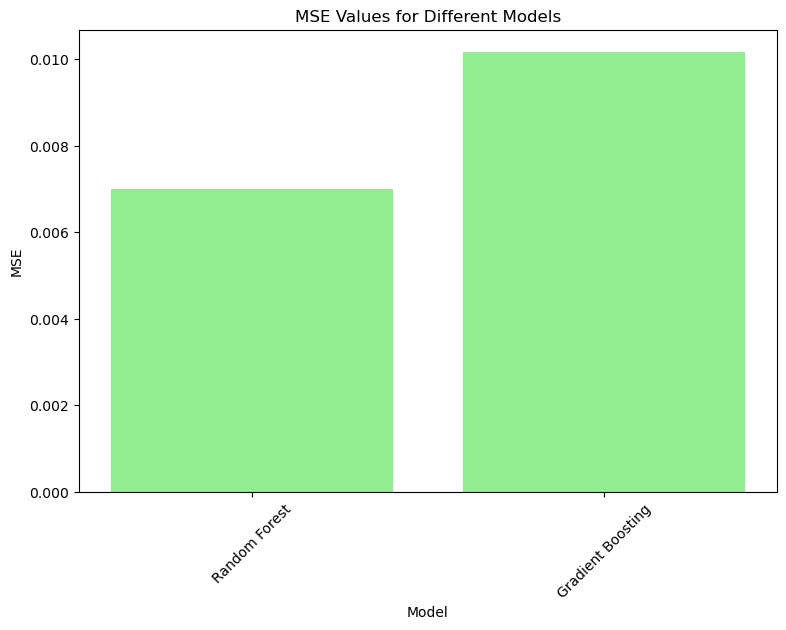

In [15]:
#plotting the accuracy scores

plt.figure(figsize=(9,6))
plt.bar(df_metrics['Model'],df_metrics['MSE'],color='lightgreen')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE Values for Different Models')
plt.xticks(rotation=45)

# Save the figure
plt.savefig('plot1.png')
plt.show()

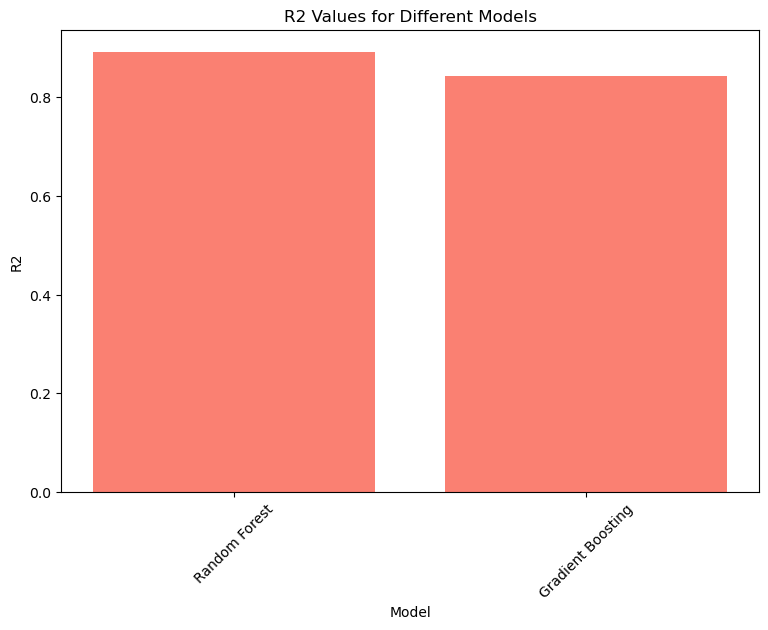

In [16]:
plt.figure(figsize=(9,6))
plt.bar(df_metrics['Model'],df_metrics['R2'],color='salmon')
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 Values for Different Models')
plt.xticks(rotation=45)

plt.savefig('plot2.png')
plt.show()

Based on the above metrics results, **Random Forest** is the best model among the ones compared. It has the highest R² and lowest MSE.

### 7.4.Applying Grid search CV for hyperparameter Tuning

### 7.4.1.Parameter Tuning for Random Forest Regression

In [17]:
# Define the model

rf= RandomForestRegressor(random_state=42)

# Define the parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate Grid Search CV
grid_search_rf= GridSearchCV(rf,param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=0)

# Fit the grid search to the data
grid_search_rf.fit(X_train,y_train)

# Get the best parameters and best model 
best_params_rf= grid_search_rf.best_params_

best_model= grid_search_rf.best_estimator_

#Best score achived during the grid search
best_score_rf= grid_search_rf.best_score_

print("Best Parameters:", best_params_rf)
print("Best R2 Score:", best_score_rf)

# predict on the test set

y_pred_rf2= best_model.predict(X_test)

# Evaluate on the model
test_score_rf = best_model.score(X_test, y_test)
print("Test Score:", test_score_rf)


mse_rf2= mean_squared_error(y_test,y_pred_rf2)
r2_rf2= r2_score(y_test,y_pred_rf2)


print("Mean Squared Error on test set: ", mse_rf2)
print("R2 score on test set: ", r2_rf2)

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R2 Score: 0.8701899679036794
Test Score: 0.880616001946178
Mean Squared Error on test set:  0.007744397701192823
R2 score on test set:  0.880616001946178


The high R2 scores (both during cross-validation and on the test set) suggest that the model is performing well and is able to explain a significant portion of the variance in the target variable.

### 7.5.Residual Analysis

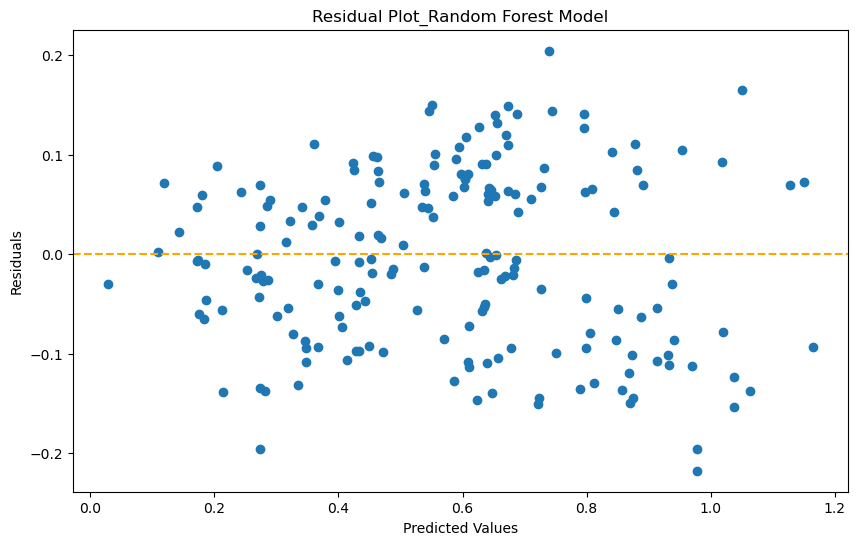

In [18]:
residuals = y_test - y_pred_rf2

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf2, residuals)
plt.axhline(y=0, color='orange', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot_Random Forest Model')

# Save the figure
plt.savefig('plot3.png')

plt.show()

The residual plot for the Random Forest model shows that the residuals are fairly evenly distributed around zero, indicating that the model captures the relationship between the predictors and the target variable reasonably well. However, the increasing spread of residuals with higher predicted values suggests potential heteroscedasticity, where the model's predictions may be less reliable for larger values.

There are no obvious patterns in the residuals, which is a positive sign, indicating that the model is not missing significant relationships in the data. However, a few points with large residuals suggest potential outliers or areas where the model could improve.



### 7.6.Time Series

For the ARIMA model, I need to combine the Year and Month columns into a single datetime index, which ARIMA can then use as a time series index.

In [19]:
# Combine Year and Month columns into a new column 'Date'

df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))


#Drop the 'Year' and 'Month' columns 

df.drop(['Year', 'Month'], axis=1, inplace=True)


In [20]:
df

,Anomaly,Uncertainty,CO2,CH4,N2O,Actual_Temperature,Date
0,0.291,0.055,344.32,1638.79,303.8,12.521,1984-01-01
1,0.145,0.054,344.82,1638.84,303.8,12.585,1984-02-01
2,0.292,0.042,344.96,1640.88,303.7,13.352,1984-03-01
3,0.178,0.070,345.19,1643.99,303.7,14.148,1984-04-01
4,0.388,0.043,345.33,1643.12,303.7,15.338,1984-05-01
...,...,...,...,...,...,...,...
931,0.830,0.034,414.41,1908.82,335.8,16.610,2022-08-01
932,0.756,0.034,414.63,1915.52,335.9,15.946,2022-09-01
933,0.871,0.034,416.14,1919.85,336.1,15.121,2022-10-01
934,0.654,0.048,417.77,1923.43,336.3,13.884,2022-11-01


### 7.6.1. Visualizing

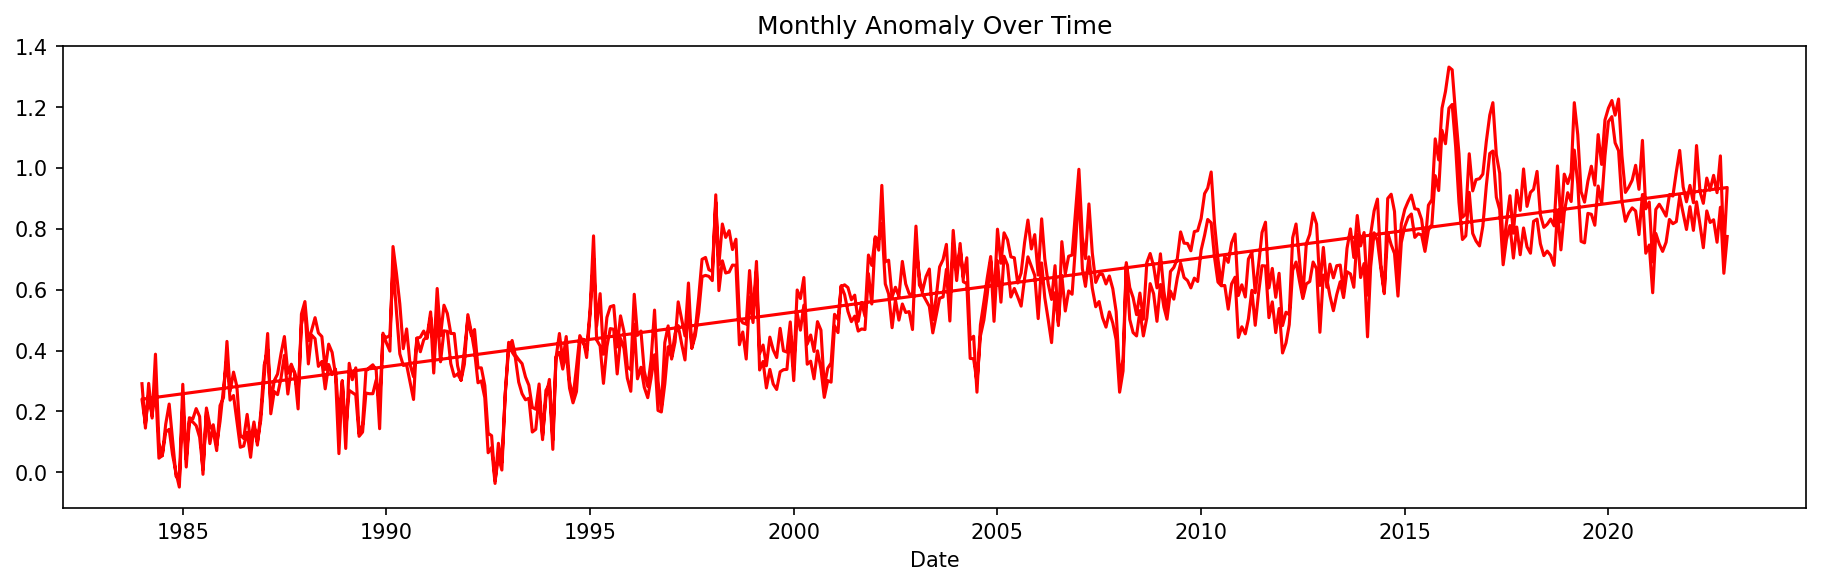

In [21]:
def plot_df(df,x,y,title='',xlabel='Date',ylabel='', dpi=150):
    plt.figure(figsize=(15,4),dpi=dpi)
    plt.plot(x,y,color='red')
    plt.gca().set(title=title,xlabel=xlabel,ylabel=ylabel)
    plt.show()

plot_df(df,x=df['Date'],y=df['Anomaly'],title='Monthly Anomaly Over Time')

The plot indicates the presence of cyclic behavior, characterized by recurring increases and decreases in the anomaly values over time.

In [22]:
x= df['Date'].values
y1= df['Anomaly'].values

def filled_plot(x, y1, y2, title='', alpha=0.5, dpi=120):
    fig, ax = plt.subplots(1, 1, figsize=(16, 5), dpi=dpi)
    plt.fill_between(x, y1=y1, y2=y2, alpha=alpha, linewidth=2, color='seagreen')
    plt.ylim(min(y1.min(), y2.min()) - 0.1, max(y1.max(), y2.max()) + 0.1)
    plt.title(title, fontsize=16)
    plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=0.5)
    plt.show()

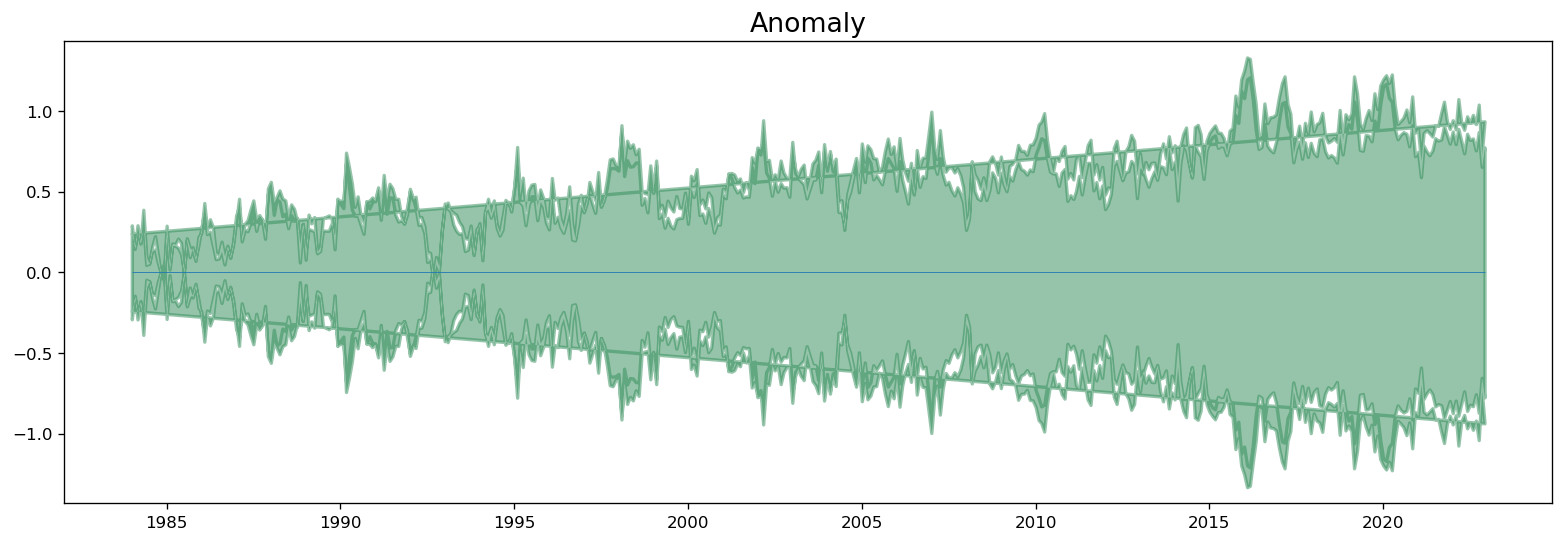

In [23]:
filled_plot(x,y1=y1,y2= -y1,title='Anomaly')

In [24]:
df.columns

Index(['Anomaly', 'Uncertainty', 'CO2', 'CH4', 'N2O', 'Actual_Temperature',
       'Date'],
      dtype='object')

The range of anomalies appears to increase over time, the temperature has become more variable in recent years. Also there is a potential trend, an upward shift in anomalies temperature, particularly towards the later years, indicating a change in the temperature data.

### 7.6.2. Time series Decomposition

 Since my data contains negative values, I should use the additive model for decomposition.Because the multiplicative decomposition model assumes that the data is strictly positive.

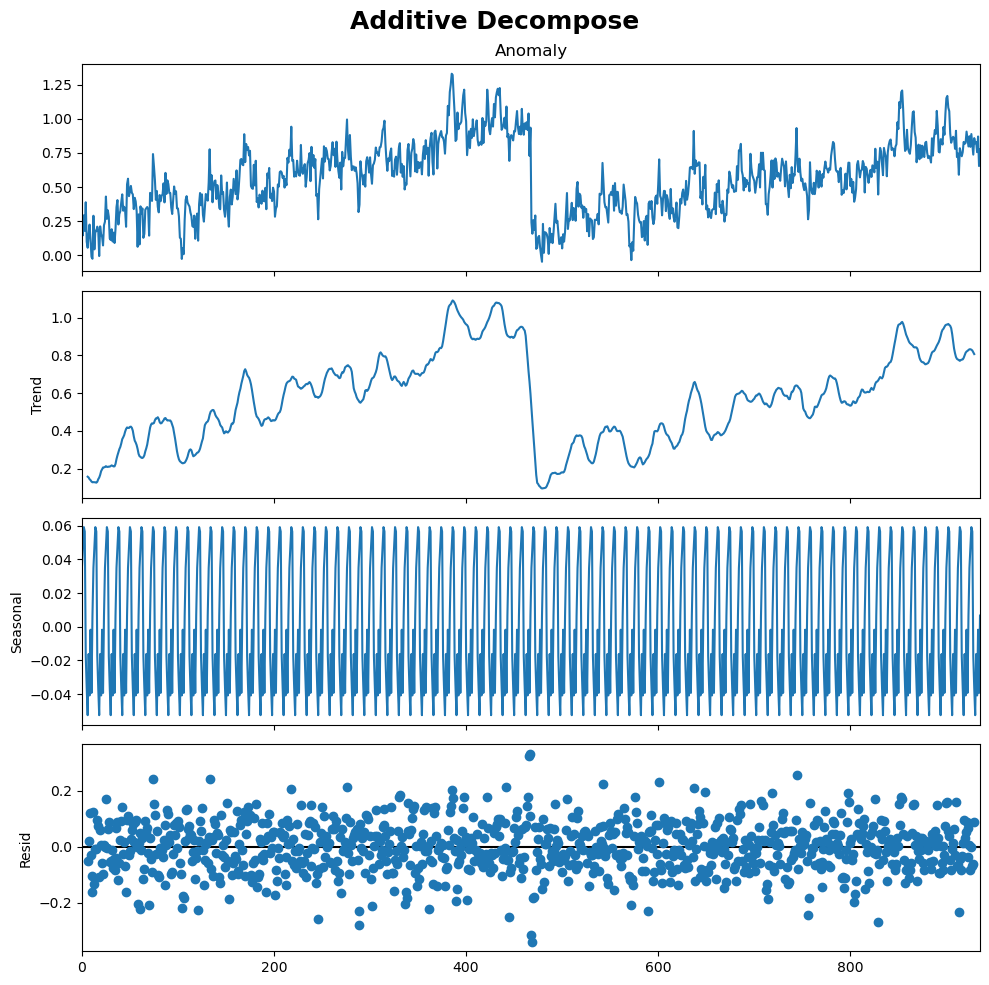

<Figure size 1000x1000 with 0 Axes>

In [25]:
# Additive Decomposition
result_add = seasonal_decompose(df['Anomaly'], model='additive',period=12)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decompose', fontsize=18, weight='bold')
plt.tight_layout()
plt.show()
plt.subplots_adjust(top=0.9)

**Trend:**
There is an overall upward trend in the data, anomaly is increasing over time, although there was a notable dip  around the middle of the series. After this drop, the trend resumes an upward direction.


**Seasonality:**
The data has a strong seasonal component, indicating regular patterns that repeat over time.

**Residuals:** The residuals appear to be randomly scattered, the model captures the main trends and seasonality well.

### 7.6.3.Stationarity Check

In [26]:
# Function to perform ADF test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
        
# Check stationarity of anomaly data
adf_test(df['Anomaly'])

ADF Statistic: -2.668976332820223
p-value: 0.0795622823258163
Critical Values:
	1%: -3.437524792681557
	5%: -2.8647073745235074
	10%: -2.568456513461879


The p-value is 0.07956, which is greater than the common significance level of 0.05. This means that we can't reject the null hypothesis of the test. In the context of the ADF test, the null hypothesis is that the series has a unit root, indicating that the series is **non-stationary**.

The ADF statistic is -2.669, which is less negative than all the critical values at the 1%, 5%, and 10% significance levels. This further supports the conclusion that the series is **non-stationary**.

In [27]:
# Function to perform KPSS Test

def kpss_test(series):
    result = kpss(df.Anomaly.values, regression='c')
    print('\nKPSS Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    for key, value in result[3].items():
        print('Critial Values:')
        print(f'   {key}, {value}')
        
kpss_test(df['Anomaly'])


KPSS Statistic: 0.662573
p-value: 0.016948
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


The p-value is 0.016948, which is below the typical significance level of 0.05 so we can reject the null hypothesis of the test. The null hypothesis of the KPSS test is that the series is stationary.

The KPSS statistic (0.663) is higher than the 5% and 10% critical values but lower than the 1% critical value. This suggests that the series is likely non-stationary, as the test statistic is beyond the critical values at the 5% and 10% levels.


In [28]:
# Apply differencing 
df['Anomaly_diff'] = df['Anomaly'].diff().dropna()
adf_test(df['Anomaly'])

ADF Statistic: -2.668976332820223
p-value: 0.0795622823258163
Critical Values:
	1%: -3.437524792681557
	5%: -2.8647073745235074
	10%: -2.568456513461879


The p-value (0.079) after differencing shows the series might still not be stationary at the 5% significance level, but it is borderline at the 10% level.
The ADF statistic is closer to the critical value for the 10% level, which means that the series could be considered stationary.But I want to consider applying a second round of differencing. 

In [29]:
# Apply second differencing

df['Anomaly_diff2'] = df['Anomaly_diff'].diff().dropna()

# Drop NaN values after second differencing
df.dropna(subset=['Anomaly_diff2'], inplace=True)  # due to error(MissingDataError)

# Perform ADF test on the second differenced series

adf_test(df['Anomaly_diff2'])

ADF Statistic: -12.747049895697419
p-value: 8.694839378545383e-24
Critical Values:
	1%: -3.4375090829661534
	5%: -2.864700447588469
	10%: -2.5684528237924527


**ADF Statistic (-12.75):** This is a very large negative value, which strongly rejects the null hypothesis of the ADF test, indicating that the series is **stationary**.

**p-value (8.69e-24):** This extremely small p-value also suggests strong stationarity.


### 7.6.4.Selecting ARIMA Model Parameters (p, d, q)

### 7.6.4.1.Plot ACF and PACF

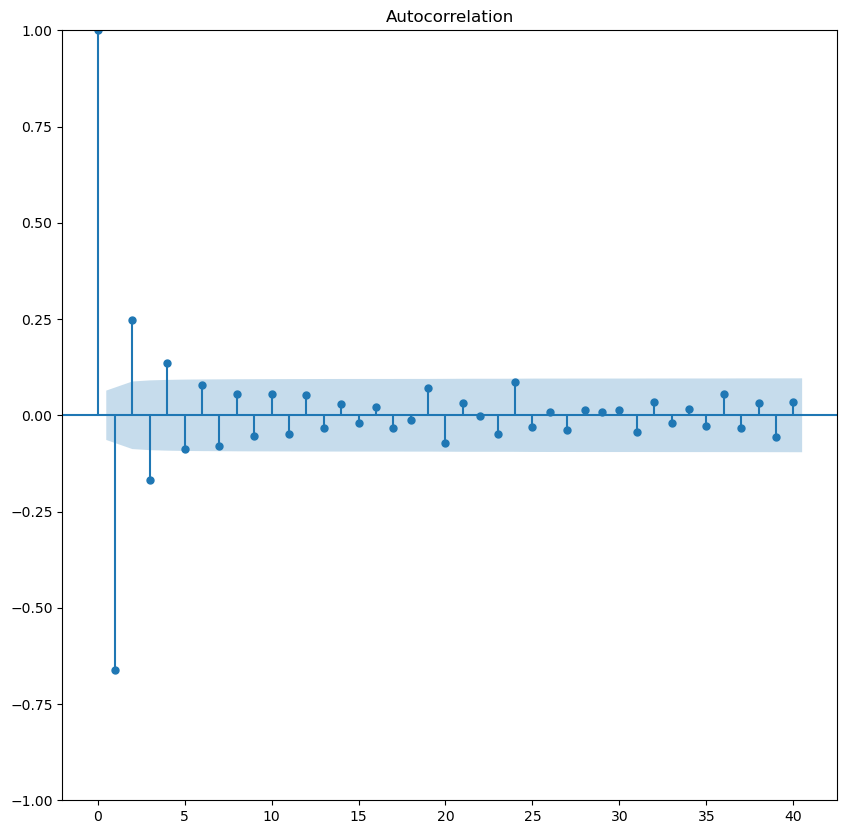

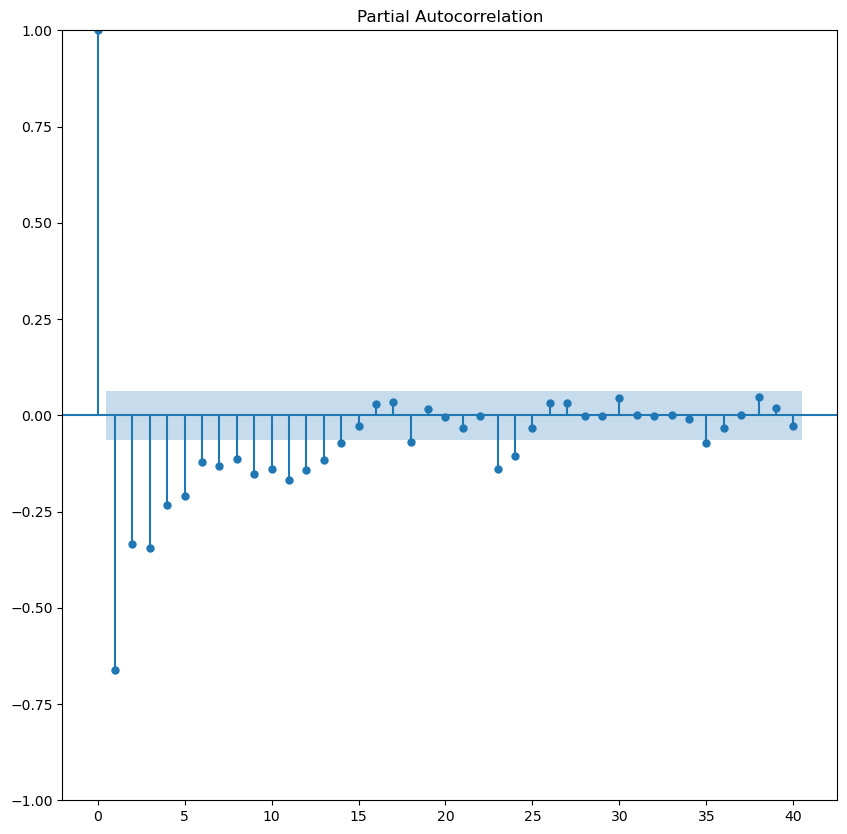

In [30]:
# Plot ACF and PACF for the differenced data

plot_acf(df['Anomaly_diff2'].dropna(), lags=40)
plt.show()

plot_pacf(df['Anomaly_diff2'].dropna(), lags=40)
plt.show()

**ACF**: The ACF plot shows a significant spike at lag 1 and a few other lags but quickly diminishes and stays within the confidence interval. This suggests that the Moving Average (MA) part might include an order of 1 (q=1).

**PACF**: The PACF plot shows a significant spike at lag 1 and continues to decrease gradually, with a few lags remaining significant before becoming insignificant. This behavior suggests that the Auto-Regressive (AR) part might include an order of 1 (p=1).

Given these observations and since I already differenced twice to achieve stationarity,the order of **parameter would be :(1,2,1)** 


### 7.6.4.2. Grid Search

In [31]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

best_aic = float("inf")
best_order = None

for order in pdq:
    try:
        model = ARIMA(df['Anomaly'], order=order)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = order
    except:
        continue

print('Best ARIMA order:', best_order)

Best ARIMA order: (2, 1, 2)


### 7.6.5. Fitting the ARIMA Model

After determining the parameters from the ACF and PACF plots ( p=1, d=2, q=1 for demonstration):

In [32]:
# Fit the ARIMA model with determined parameters p=1, d=2, q=1
model = ARIMA(df['Anomaly'].values, order=(1, 2, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  934
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 725.090
Date:                Thu, 29 Aug 2024   AIC                          -1444.180
Time:                        23:25:50   BIC                          -1429.668
Sample:                             0   HQIC                         -1438.646
                                - 934                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3535      0.027    -13.339      0.000      -0.405      -0.302
ma.L1         -1.0000      2.907     -0.344      0.731      -6.697       4.697
sigma2         0.0123      0.036      0.344      0.7

In [33]:
# Fit the ARIMA model with determined parameters p=1, d=2, q=1
model2 = ARIMA(df['Anomaly'].values, order=(2, 1, 2))
model2_fit = model.fit()

# Summary of the model
print(model2_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  934
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 725.090
Date:                Thu, 29 Aug 2024   AIC                          -1444.180
Time:                        23:25:50   BIC                          -1429.668
Sample:                             0   HQIC                         -1438.646
                                - 934                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3535      0.027    -13.339      0.000      -0.405      -0.302
ma.L1         -1.0000      2.907     -0.344      0.731      -6.697       4.697
sigma2         0.0123      0.036      0.344      0.7

### 7.6.6.Examining the Residuals 

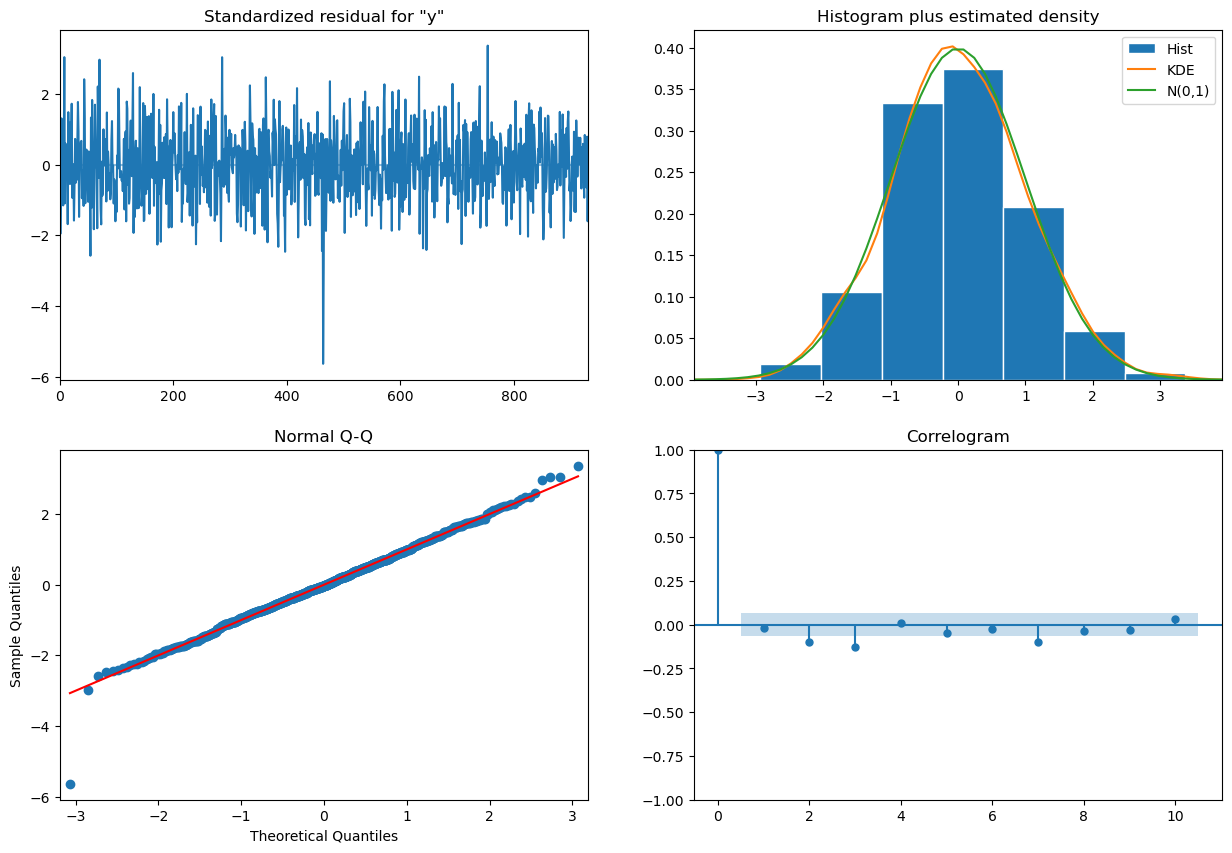

In [34]:
# Calculate residuals for first model
model_fit.plot_diagnostics(figsize=(15, 10))
plt.show()

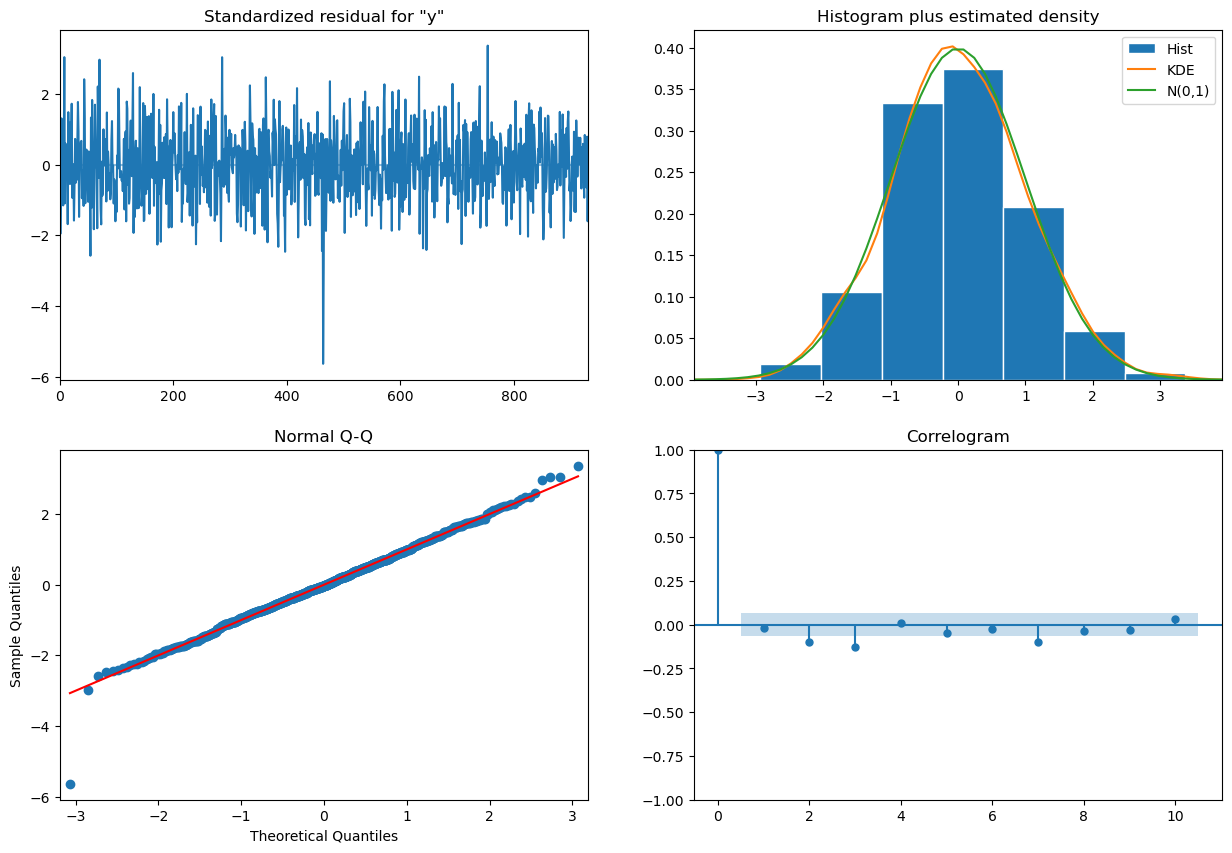

In [35]:
# Calculate residuals for second model

model2_fit.plot_diagnostics(figsize=(15,10))
plt.show()

Based on the above plots, both model(1&2) have same pattern.


**Standardized Residuals:**

The residuals appear to be randomly scattered around zero with no clear pattern, which is good as it indicates that the model does not have a significant bias. However, there are some spikes, which could be outliers or areas where the model is not performing as well. So, it shows that the model has captured most of the structure in the data.

**Histogram Plus KDE Plot:**

The residuals seem to follow a normal distribution, which is a good sign. This means that the errors are likely due to random noise rather than some unmodeled pattern in the data.

**Normal Q-Q Plot :**

This plot indicates that the residuals mostly follow a normal distribution. There are some minor deviations at the tails, but as long as the majority of the points lie on the line, the assumption of normality is reasonably satisfied.

**Autocorrelation(ACF) Plot:**

The ACF plot shows the autocorrelation of the residuals at different lags.Plots showed there isn't much autocorrelation left in the residuals.Therefore lack of significant autocorrelation in the ACF plot indicate that the model has adequately captured the underlying structure of the data.


### 7.6.7.Forecasting/Predicting Future Values

In [44]:
# Forecasting the next 30 years (assuming monthly data, this would be 30*12 = 360 steps)

forecast = model2_fit.forecast(step=360)  # Forecasting the next 30 time periods
print(forecast)

[0.73292562]


In [37]:
# Convert the Date column to datetime 

df['Date']= pd.to_datetime(df['Date'])

# Set the Date column as the index
df.set_index('Date', inplace=True)

print(df.index[-1])

2022-12-01 00:00:00


In [45]:
forecast_index= pd.date_range(start=df.index[-1],periods=361,freq='MS')
forecast = np.repeat(forecast, 361)  # due to forecast_value is a single number
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecasted_Temperature'])

print(forecast_df)

            Forecasted_Temperature
2022-12-01                0.732926
2023-01-01                0.732926
2023-02-01                0.732926
2023-03-01                0.732926
2023-04-01                0.732926
...                            ...
2052-08-01                0.732926
2052-09-01                0.732926
2052-10-01                0.732926
2052-11-01                0.732926
2052-12-01                0.732926

[361 rows x 1 columns]


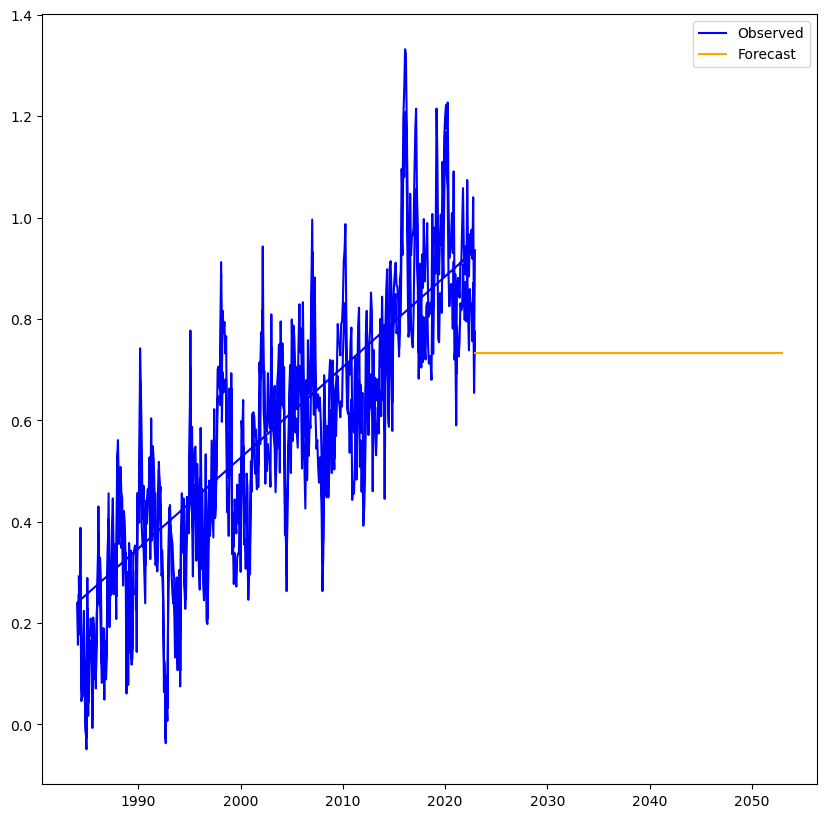

In [47]:
# Plotting
plt.figsize=(10,6)
plt.plot(df.index,df['Anomaly'],label='Observed', color='blue')
plt.plot(forecast_df.index,forecast_df['Forecasted_Temperature'],label='Forecast', color='orange')
plt.xlabel=('Year')
plt.ylabel=('Anomaly')
plt.title=('Observed vs. Forecast ')
plt.legend()
plt.show()
